# Overview
This purpose of this book is to test out the data augmentation functions created
in the util module

In [1]:
import sys
import os
sys.path.insert(0, '../')
import util
import models.inceptionv3 as inception

Using TensorFlow backend.


In [2]:
from matplotlib import pyplot as plt
from keras.preprocessing import image
import numpy as np
%matplotlib inline

In [3]:
# rgb_dir = '/media/jeremy/TOSHIBA EXT/Research/roof_learning/witten/pics/test/rgb'
# lidar_dir = '/media/jeremy/TOSHIBA EXT/Research/roof_learning/witten/pics/test/lidar'
rgb_dir = '../imgs/pics/test/rgb'
lidar_dir = '../imgs/pics/test/lidar'

Found 144 images belonging to 6 classes.
flat


flat


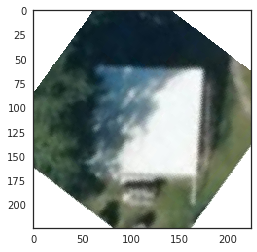

flat


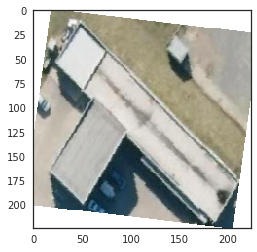

flat


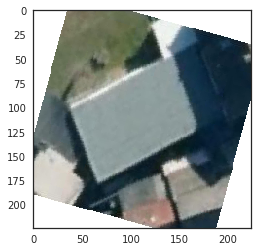

In [4]:
generator = util.image_generator(rgb_dir, batch_size=4, shuffle=False, preprocess_input=inception.InceptionV3.preprocess_input)

imgs, categories = generator.__next__()
inv_map = {v: k for k, v in generator.class_indices.items()}
for img, category in zip(imgs, categories):
    print(inv_map[np.argmax(category)])
    img = image.array_to_img(img)
    plt.imshow(img)
    plt.show()

In [5]:
generator = util.dual_image_generator(rgb_dir=rgb_dir, lidar_dir=lidar_dir, seed=1, batch_size=8, augment=True, shuffle=False, preprocess_input=inception.InceptionV3.preprocess_input)

Found 144 images belonging to 6 classes.
Found 144 images belonging to 6 classes.


2
flat


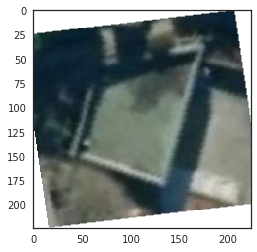

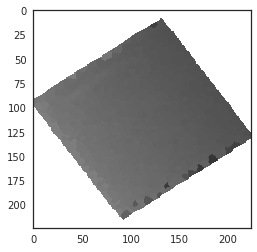

flat


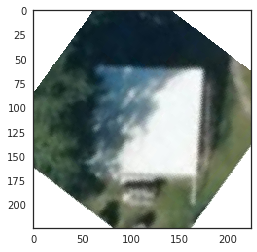

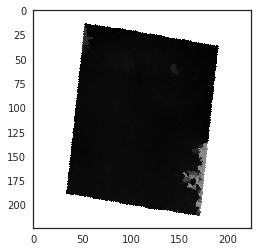

flat


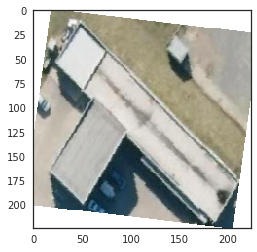

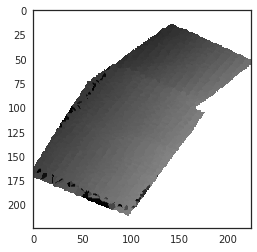

flat


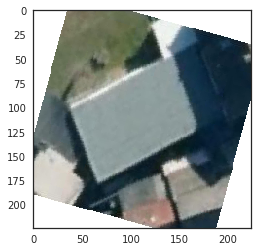

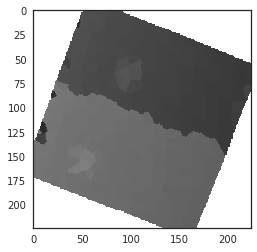

flat


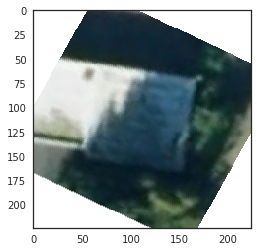

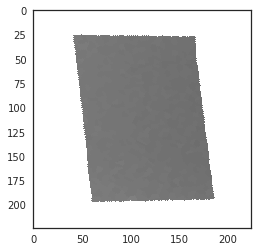

flat


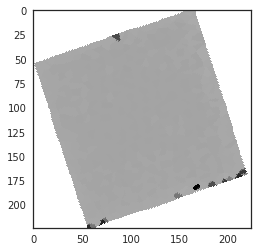

flat


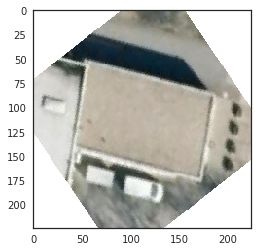

flat


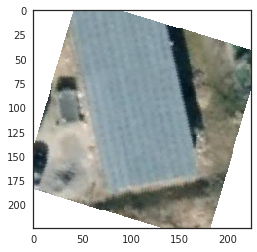

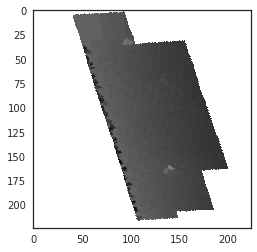

In [6]:


imgs, categories = generator.__next__()
print(len(imgs))
inv_map = {v: k for k, v in generator.class_indices.items()}
for rgb_img, lidar_img, category in zip(imgs[0],imgs[1], categories):
    print(inv_map[np.argmax(category)])
    rgb_img = image.array_to_img(rgb_img)
    plt.imshow(rgb_img)
    plt.show()
    lidar_img = image.array_to_img(lidar_img)
    plt.imshow(lidar_img)
    plt.show()

In [11]:
print(os.getcwd())
generator1 = util.image_generator(rgb_dir, seed=1, batch_size=8, augment=True, shuffle=False, preprocess_input=inception.InceptionV3.preprocess_input)
generator2 = util.image_generator(lidar_dir, seed=1, batch_size=8, augment=True, shuffle=False, preprocess_input=inception.InceptionV3.preprocess_input)

/home/jeremy/Documents/roof-learning-keras/notebooks
Found 144 images belonging to 6 classes.
Found 144 images belonging to 6 classes.


In [12]:
print(generator1.original.filenames)
print('\n\n\n')
print(generator2.original.filenames)

['flat/345400591.jpg', 'flat/336847103.jpg', 'flat/345748686.jpg', 'flat/338046385.jpg', 'flat/335576729.jpg', 'flat/369282488.jpg', 'flat/339324848.jpg', 'flat/377310925.jpg', 'flat/437205926.jpg', 'flat/345079373.jpg', 'flat/338301094.jpg', 'flat/335419869.jpg', 'flat/377310926.jpg', 'flat/345748692.jpg', 'flat/339324825.jpg', 'flat/370929701.jpg', 'flat/466654282.jpg', 'flat/399070129.jpg', 'flat/447292226.jpg', 'flat/438154056.jpg', 'flat/345748731.jpg', 'flat/349671240.jpg', 'flat/339730157.jpg', 'flat/452940513.jpg', 'flat/493226497.jpg', 'gabled/332753971.jpg', 'gabled/336861849.jpg', 'gabled/336847238.jpg', 'gabled/329300014.jpg', 'gabled/313440433.jpg', 'gabled/335363345.jpg', 'gabled/427470278.jpg', 'gabled/332715813.jpg', 'gabled/343790151.jpg', 'gabled/314610465.jpg', 'gabled/332753902.jpg', 'gabled/473871433.jpg', 'gabled/335363254.jpg', 'gabled/454710307.jpg', 'gabled/313624893.jpg', 'gabled/311804196.jpg', 'gabled/328162788.jpg', 'gabled/318823275.jpg', 'gabled/321467482

8
flat


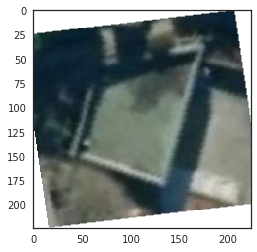

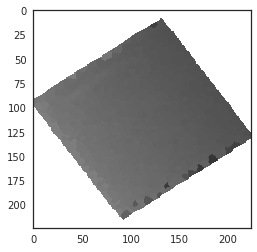

flat


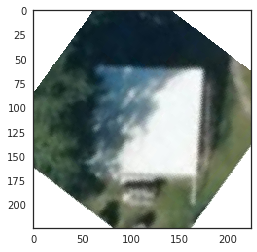

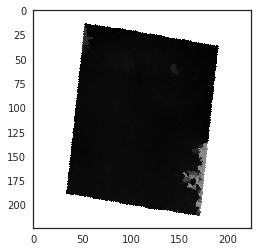

flat


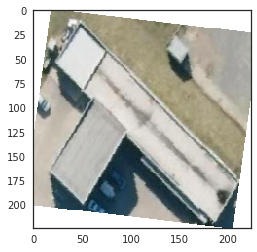

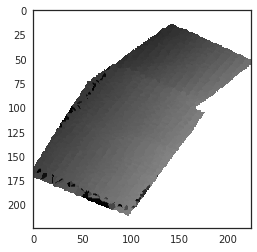

flat


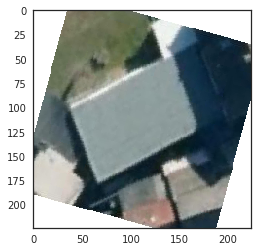

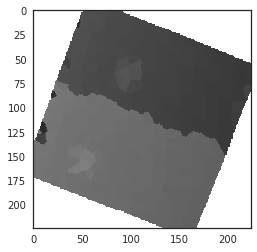

flat


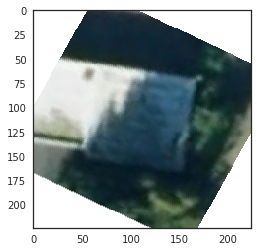

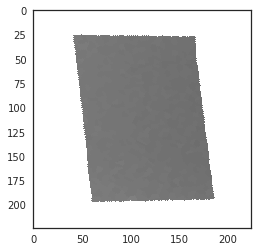

flat


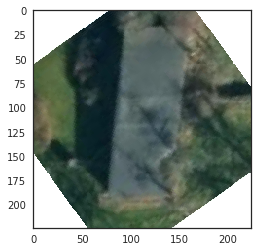

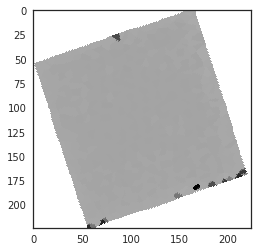

flat


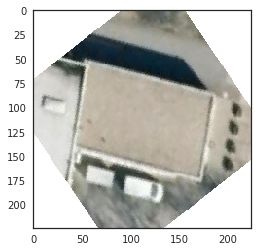

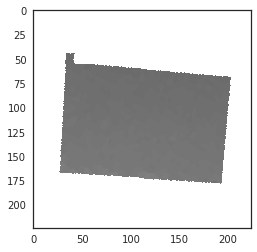

flat


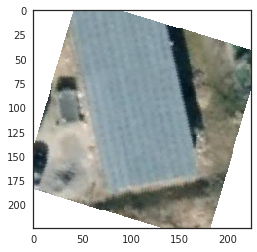

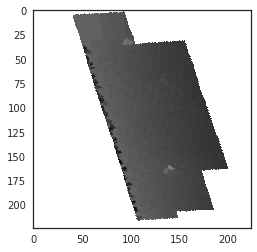

In [13]:
imgs, categories = generator1.__next__()
imgs2, categories = generator2.__next__()
print(len(imgs))
inv_map = {v: k for k, v in generator.class_indices.items()}
for rgb_img, lidar_img, category in zip(imgs, imgs2, categories):
    print(inv_map[np.argmax(category)])
    rgb_img = image.array_to_img(rgb_img)
    plt.imshow(rgb_img)
    plt.show()
    lidar_img = image.array_to_img(lidar_img)
    plt.imshow(lidar_img)
    plt.show()
    